# In ‘classroom_actions.csv’ dataset
Test that average completion rate for the group
experiment is bigger than the average completion rate in group control


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [2]:
obs_diff=df[df.group=='experiment'].completed.mean()/df[df.group=='experiment'].completed[df.completed==True].mean()-df[df.group=='control'].completed.mean()/df[df.group=='control'].completed[df.completed==True].mean()
obs_diff

0.02153829499022919

In [3]:
df.shape

(3829, 5)

(array([3.000e+00, 6.000e+01, 2.960e+02, 1.339e+03, 2.677e+03, 3.039e+03,
        1.849e+03, 6.180e+02, 1.100e+02, 9.000e+00]),
 array([-0.0444269 , -0.03171262, -0.01899835, -0.00628407,  0.0064302 ,
         0.01914448,  0.03185875,  0.04457303,  0.0572873 ,  0.07000158,
         0.08271585]),
 <a list of 10 Patch objects>)

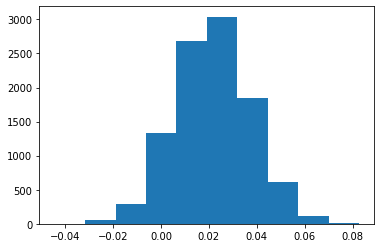

In [4]:
diff=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    diff.append(sample[sample.group=='experiment'].completed.mean()/sample[sample.group=='experiment'].completed[df.completed==True].mean()-sample[sample.group=='control'].completed.mean()/sample[sample.group=='control'].completed[df.completed==True].mean())
plt.hist(diff)


(array([   5.,   21.,  208.,  963., 2325., 3059., 2291.,  916.,  180.,
          32.]),
 array([-0.0680736 , -0.05565036, -0.04322713, -0.03080389, -0.01838066,
        -0.00595742,  0.00646581,  0.01888905,  0.03131228,  0.04373552,
         0.05615875]),
 <a list of 10 Patch objects>)

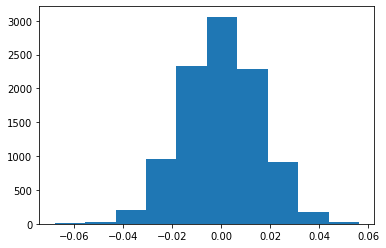

In [5]:
diff=np.array(diff)
null=np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

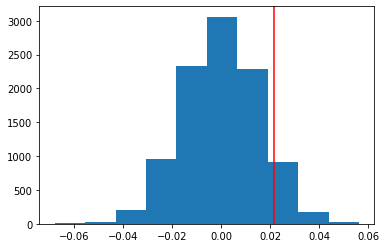

In [6]:
plt.hist(null)
plt.axvline(x=obs_diff,c='red')

In [7]:
(null>obs_diff).mean()

0.0859